# Exploratory Data Analytics on Haberman`s Survival Dataset

## Organization of this document
<ul style="list-style-type:none; font-size:16px;">
    <li>1.  Importing the necessary packages</li>
    <li>2.  About the dataset</li>
    <li>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.1 Loading the data</li>
    <li>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2 Objective</li>
    <li>3.  Understanding Various High Level Information About The Dataset</li>
    <li>4.  Making some changes in dataset</li>
    <li>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.1 Replacing the status values for better understanding</li>
    <li>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.2 Replacing the year values by appending '19' to every value</li>
    <li>5.  Bivariate Analysis on various features</li>
    <li>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.1 Age v/s Nodes (Scatter plot between age and nodes)
</li>
    <li>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.2 Years v/s Nodes (Line plot between year and nodes)</li>
    <li>6.  Univariate Analysis</li>
    <li>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.1 Distribution plot of lymph node</li>
    <li>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.2 Distribution plot of age</li>
    <li>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.3 Factor plot of years</li>
    <li>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.4 Plotting PDF v/s CDF for age</li>
    <li>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.5 Plotting PDF v/s CDF for lymph nodes</li>
    <li>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.6  Plotting PDF v/s CDF for year</li>
    <li>7.  Multivariate Analysis</li>
    <li>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;7.1  Pair plot of all the features</li>
    <li>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;7.2  Heatmap of all features</li>
    <li>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;7.3  Multivariate Point Plot of age v/s nodes and year v/s nodes</li>
    <li>8.  Understanding Central tendancy of various features in the data</li>
    <li>9.  Conclusions</li>
    
<blockquote>This document is prepared by karthikchiru12@gmail.com</blockquote>   
    
</ul>

## 1. Importing the necessary packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## 2. About the dataset
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


### 2.1 Loading the data

In [3]:
#Loading the data
haberman = pd.read_csv('Data/haberman.csv')
# Printing first ten records 
print(haberman.head(10))

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1
5   33    58     10       1
6   33    60      0       1
7   34    59      0       2
8   34    66      9       2
9   34    58     30       1


### 2.2 Objective 

<blockquote style="font-size:20px;">To identify trends and pattrens in the survivabilty of the haberman`s dataset.</blockquote>


## 3. Understanding Various High Level Information About The Dataset
1. How many data-points and features?
2. What are the column names/attributes/features/variables in our dataset?
3. How many data points for each class/feature/class label are present?
4. Other information about types of values in each column?
<br><br>
*Assuming 'status' as our class label

In [4]:
print("Shape of the dataset :",haberman.shape)
print("\nColumns in dataset   :",list(haberman.columns))
print("\nData per each class  :\n")
print(haberman['status'].value_counts())
print("\n\nOther information    :\n")
print(haberman.describe().T)

Shape of the dataset : (306, 4)

Columns in dataset   : ['age', 'year', 'nodes', 'status']

Data per each class  :

1    225
2     81
Name: status, dtype: int64


Other information    :

        count       mean        std   min   25%   50%    75%   max
age     306.0  52.457516  10.803452  30.0  44.0  52.0  60.75  83.0
year    306.0  62.852941   3.249405  58.0  60.0  63.0  65.75  69.0
nodes   306.0   4.026144   7.189654   0.0   0.0   1.0   4.00  52.0
status  306.0   1.264706   0.441899   1.0   1.0   1.0   2.00   2.0


<blockquote>
    And from the above information we can understand that the haberman`s dataset is <b>somewhat imbalanced</b> because there are 225 samples which indicate people who survived longer than 5 years. And only 81 samples which indicate people who died within 5 years. <i>But thinking intuitively this data is sufficent to make good inferences.<i>
</blockquote>

## 4. Making some changes in dataset


### 4.1 Replacing the status values for better understanding
1 == Survived 5 years or longer<br>
2 == Died within 5 years<br>

In [5]:
for index,row in haberman.iterrows():
    if haberman.iloc[index,3]==1:
        haberman.iloc[index,3]='Survived 5 years or longer'
    if haberman.iloc[index,3]==2:
        haberman.iloc[index,3]='Died within 5 years'
print(haberman.head(5))

   age  year  nodes                      status
0   30    64      1  Survived 5 years or longer
1   30    62      3  Survived 5 years or longer
2   30    65      0  Survived 5 years or longer
3   31    59      2  Survived 5 years or longer
4   31    65      4  Survived 5 years or longer



### 4.2 Replacing the year values by appending '19' to every value

In [6]:
for index,row in haberman.iterrows():
    haberman.iloc[index,1]=int('19'+str(haberman.iloc[index,1]))
print(haberman.head(5))

   age  year  nodes                      status
0   30  1964      1  Survived 5 years or longer
1   30  1962      3  Survived 5 years or longer
2   30  1965      0  Survived 5 years or longer
3   31  1959      2  Survived 5 years or longer
4   31  1965      4  Survived 5 years or longer


## 5. Bivariate Analysis on various features

### 5.1. Age v/s Nodes (Scatter plot between age and nodes)

Text(0.5, 1, 'SCATTER PLOT BETWEEN AGE V/S NODES')

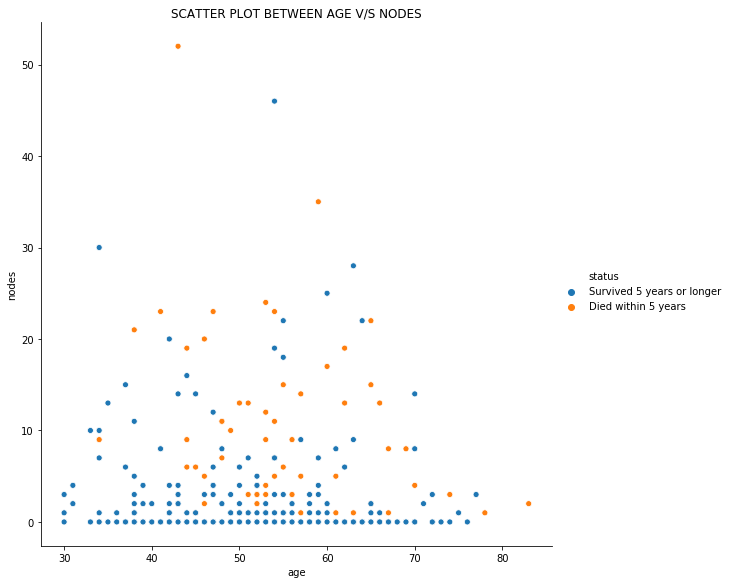

In [14]:
sns.relplot(x="age", y="nodes",hue="status",height=8,data=haberman)
plt.title("SCATTER PLOT BETWEEN AGE V/S NODES")

<blockquote>
    <b>Observations from the above scatter plot between age and nodes :</b>
    <ul>
        <li>People who had more than 50 auzillary lymph nodes did not survive and died within 5 years of operating.</li>
        <li>People who had age more than 80 did not survive and died within 5 years of operating.</li>
        <li>Clearly the above two observations can be considered as outliers for this dataset.</li>
    </ul>
</blockquote>

### 5.2. Years v/s Nodes (Line plot between year and nodes)

Text(0.5, 1.0, 'LINE PLOT BETWEEN YEAR AND NODES ')

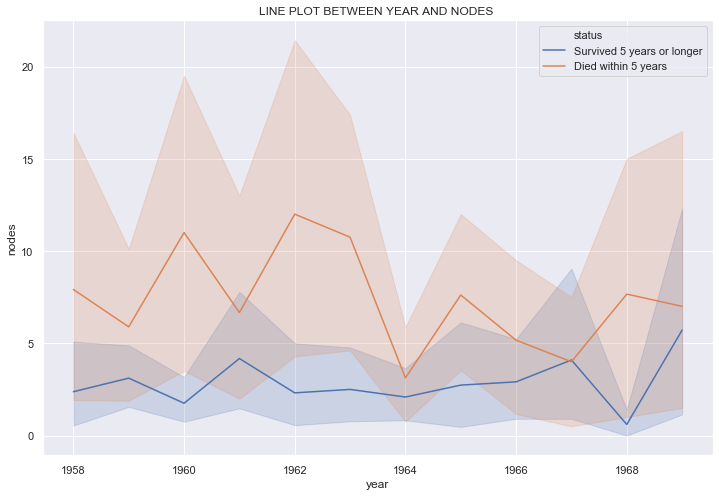

In [15]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(x="year", y="nodes",hue="status",data=haberman)
plt.title("LINE PLOT BETWEEN YEAR AND NODES ")

<blockquote>
    If we want to find about the patients and their survival rate in diferrent years, then the above plot can help us understand a little.
</blockquote>


## 6. Univariate Analysis



### 6.1. Distribution plot of lymph nodes

Text(0.5, 1, 'DISTRIBUTION PLOT OF NODES')

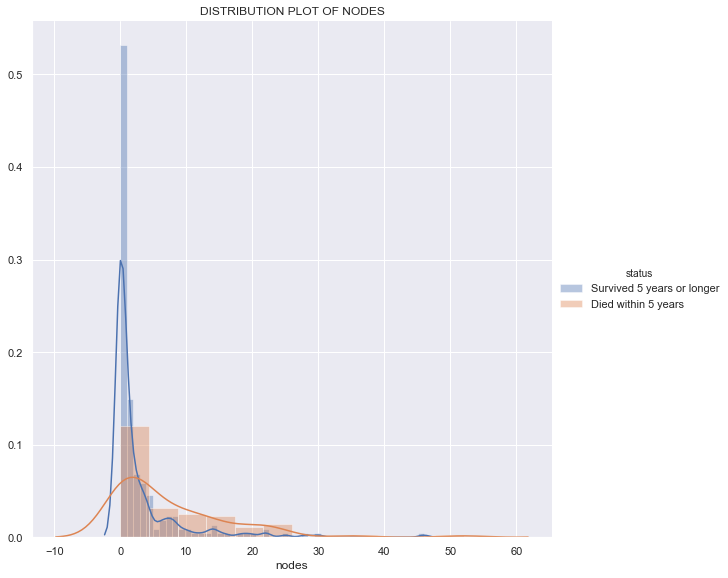

In [16]:
sns.FacetGrid(haberman, hue="status", height=8).map(sns.distplot, "nodes").add_legend()
plt.title("DISTRIBUTION PLOT OF NODES")

<blockquote>
    From the above plot we can understand that :
    <ul>
        <li>People who had lymph nodes between 0 to 5 have the highest survival rate which is more than 50%.</li>
        <li>Only 12-13% of the people who had 0-5 lymph nodes died within 5 years.</li>
        <li>For people who had more than 30 lymph nodes, it is harder to distinguish their survivability from the above plot.</li>
    </ul>
</blockquote>



### 6.2. Distribution plot of age

Text(0.5, 1, 'DISTRIBUTION PLOT OF AGE')

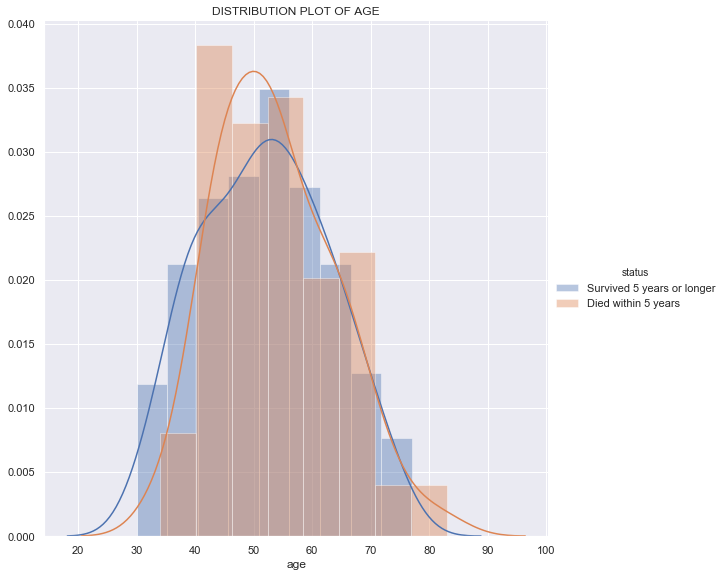

In [17]:
sns.FacetGrid(haberman, hue="status", height=8).map(sns.distplot, "age").add_legend()
plt.title("DISTRIBUTION PLOT OF AGE")

<blockquote>
    From the above plot we can understand that :
    <ul>
        <li>People who were having an age between 51-56 relatively survived the most.(at 0.035 in distplot of age).</li>
        <li>Most of the people who were having an age between 40-45 died within 5 years of operating.</li>
        <li>People who were operated at ages 30-33, all of them survived.</li>
    </ul>
</blockquote>



### 6.3. Factor plot of years

                                 FACTOR PLOT OF YEARS


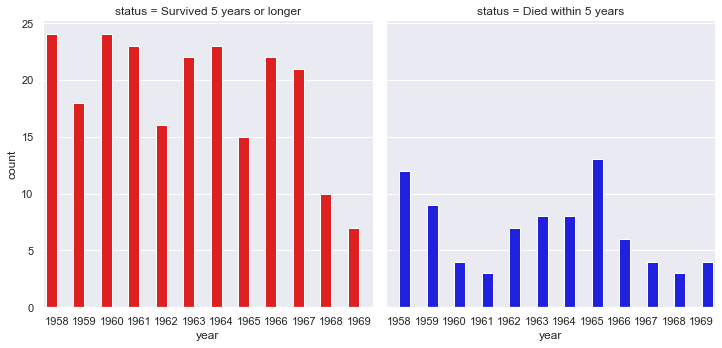

In [25]:
sns.factorplot("year", data=haberman, hue="status",kind="count",color='steelblue',col="status",
               palette={'Survived 5 years or longer':'red','Died within 5 years':'blue'})
print("                                 FACTOR PLOT OF YEARS")

<blockquote>
    From the above plot we can understand that :
    <ul>
        <li>After 1958 the number of people died gradually decreased till 1961.</li>
        <li>And the trend of 1958-1961 can be seen again between 1965-1968.</li>
    </ul>
</blockquote>

### 6.4. Plotting PDF v/s CDF for age

As we are only concerned about the survival, we only consider the cases of people who survived 5 years or longer while plotting PDF and CDF.

In [28]:
survived=haberman.loc[haberman['status']=='Survived 5 years or longer']
died=haberman.loc[haberman['status']=='Died within 5 years']

Text(0.5, 1.0, 'PLOTTING PDF v/s CDF FOR AGE')

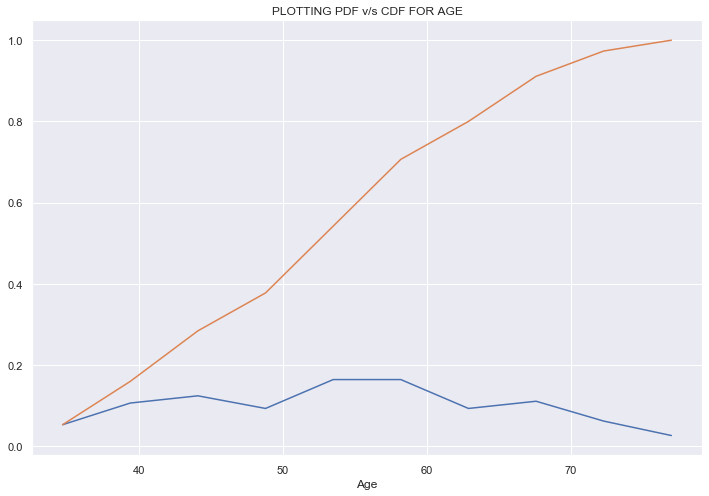

In [38]:
count1,binedges1 = np.histogram(survived['age'], bins=10, density = True)
pdf1=count1/sum(count1)
cdf1=np.cumsum(pdf1)
plt.plot(binedges1[1:],pdf1)
plt.plot(binedges1[1:], cdf1)
plt.xlabel("Age")
plt.title("PLOTTING PDF v/s CDF FOR AGE")

<blockquote>
    From the above plot we can understand that :
    <ul>
        <li>Interestingly 50% of the people ages are less than or equal to 52.(from CDF of age)</li>
    </ul>
</blockquote>

### 6.5. Plotting PDF v/s CDF for lymph nodes

Text(0.5, 1.0, 'PLOTTING PDF v/s CDF FOR LYMPH NODES')

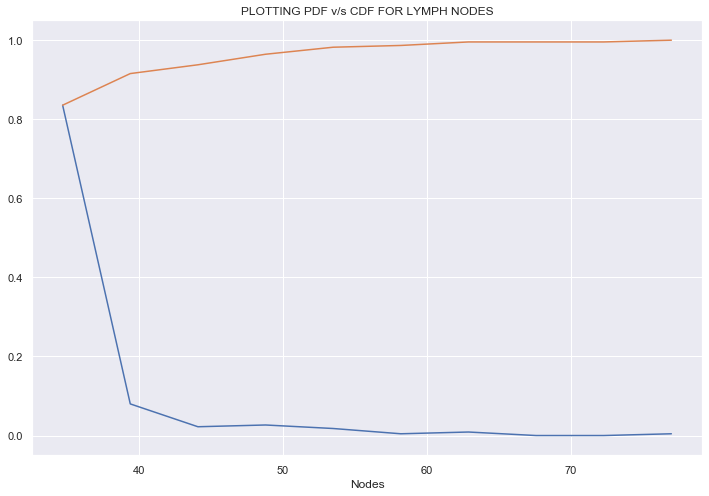

In [39]:
count2,binedges2 = np.histogram(survived['nodes'], bins=10, density = True)
pdf2=count2/sum(count2)
cdf2=np.cumsum(pdf2)
plt.plot(binedges1[1:],pdf2)
plt.plot(binedges1[1:], cdf2)
plt.xlabel("Nodes")
plt.title("PLOTTING PDF v/s CDF FOR LYMPH NODES")

<blockquote>
    From the above plot we can understand that :
    <ul>
        <li>From the CDF of lymph nodes, 90% of people had less than 40 lymph nodes.</li>
    </ul>
</blockquote>

### 6.6 Plotting PDF v/s CDF for year

Text(0.5, 1.0, 'PLOTTING PDF v/s CDF FOR YEAR')

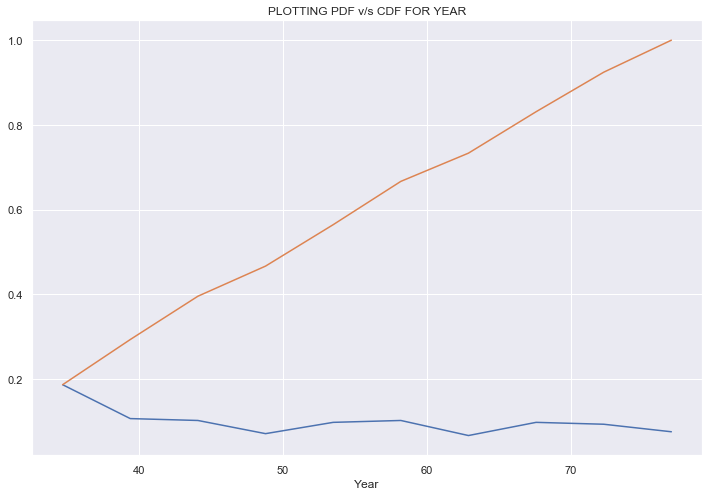

In [40]:
count3,binedges3 = np.histogram(survived['year'], bins=10, density = True)
pdf3=count3/sum(count3)
cdf3=np.cumsum(pdf3)
plt.plot(binedges1[1:],pdf3)
plt.plot(binedges1[1:], cdf3)
plt.xlabel("Year")
plt.title("PLOTTING PDF v/s CDF FOR YEAR")

## 7. Multivariate Analysis

### 7.1. Pair plot of all the features

Text(0.5, 1, 'PAIRPLOT OF ALL FEATURES IN HABERMAN`S DATASET')

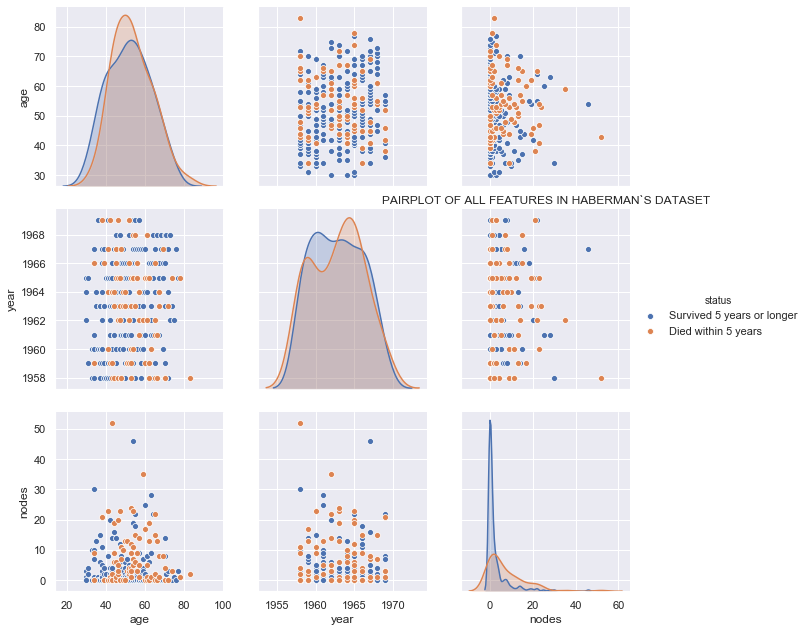

In [41]:
sns.pairplot(haberman, hue="status", height=3)
plt.title("PAIRPLOT OF ALL FEATURES IN HABERMAN`S DATASET")

<blockquote>
    From pairplot of all the features we cannot make any inferences easily.
</blockquote>

### 7.2. Heatmap of all features

Probably the most heavily used summarization visualization is the correlation plot, in which measures the correlation between every pair of values in a dataset and plots a result in color.

Text(0.5, 1, 'HEATMAP OF ALL FEATURES')

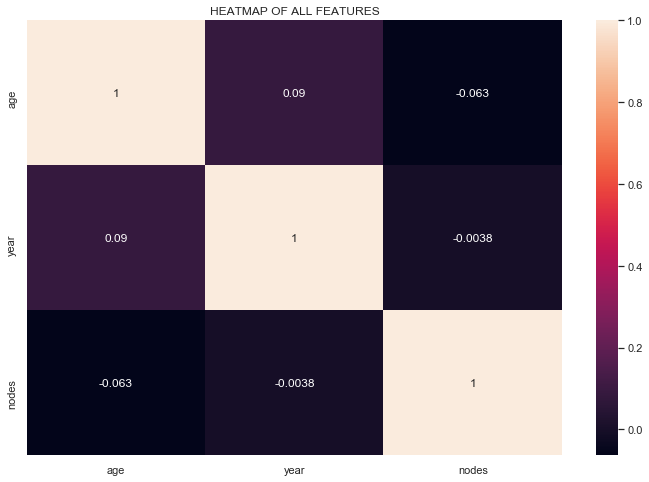

In [42]:
h=haberman.corr()
sns.heatmap(h, annot=True)
plt.title("HEATMAP OF ALL FEATURES")

<blockquote>
    <ul>
        <li>The features <b>age</b> and <b>year</b> are <b><i>negatively correlated<i></b> with the feature <b>nodes.</b></li>
            <li>The features <b>age</b> and <b>year</b> are <b><i>positively correlated.<i></b> </li>
    </ul>
</blockquote>

### 7.3. Multivariate Point Plot of age v/s nodes and year v/s nodes

                       MULTIVARIATE POINT PLOT OF AGE V/S NODES AND YEAR V/S NODES


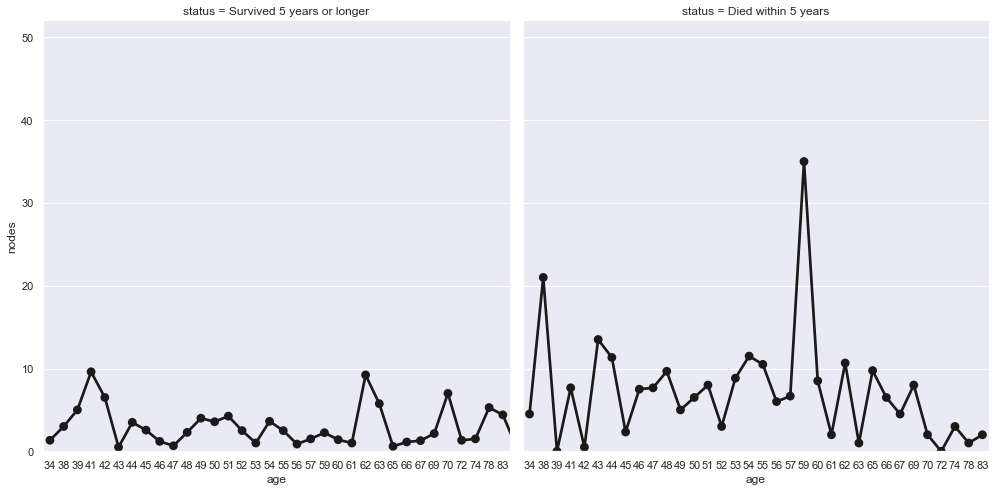

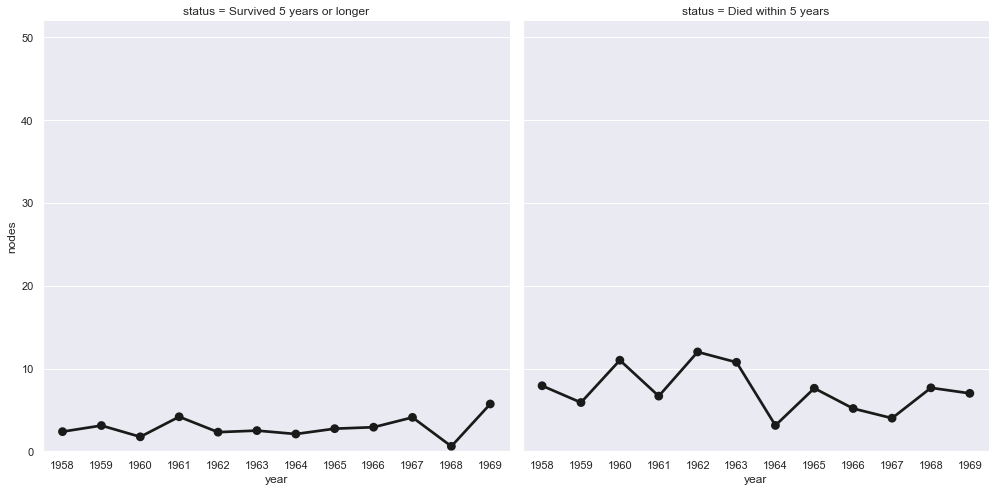

In [48]:
g = sns.FacetGrid(haberman, col="status", height=7, ylim=(0, 52))
g.map(sns.pointplot, "age", "nodes", color=".1", ci=None);
g1 = sns.FacetGrid(haberman, col="status", height=7, ylim=(0, 52))
g1.map(sns.pointplot, "year", "nodes", color=".1", ci=None);
print("                       MULTIVARIATE POINT PLOT OF AGE V/S NODES AND YEAR V/S NODES")

<blockquote>
    <ul>
        <li>Most of the people who had more than 10 lymph nodes did not survive and died within 5 years.</li>
    </ul>
</blockquote>

## 8. Understanding Central tendancy of various features in the data

In [20]:
print("People who lived 5 years or longer\n")
print(survived.describe().T)
print("\n____________________________________________________________________________________________________\n")
print("People who dies within 5 years\n")
print(died.describe().T)

People who lived 5 years or longer

       count         mean        std     min     25%     50%     75%     max
age    225.0    52.017778  11.012154    30.0    43.0    52.0    60.0    77.0
year   225.0  1962.862222   3.222915  1958.0  1960.0  1963.0  1966.0  1969.0
nodes  225.0     2.791111   5.870318     0.0     0.0     0.0     3.0    46.0

____________________________________________________________________________________________________

People who dies within 5 years

       count         mean        std     min     25%     50%     75%     max
age     81.0    53.679012  10.167137    34.0    46.0    53.0    61.0    83.0
year    81.0  1962.827160   3.342118  1958.0  1959.0  1963.0  1965.0  1969.0
nodes   81.0     7.456790   9.185654     0.0     1.0     4.0    11.0    52.0


<blockquote>
    <ul>
        <li>50% of people who survived had 0 lymph nodes.</li>
        <li>50% of the people who died had atleast 4 lymph nodes. </li>
        <li>And 75% the people who had survived 5 years or longer had less than 4 lymph nodes.</li>
    </ul>
</blockquote>

## 9. Conclusions

<blockquote style="font-size:17px;">
    <ol>
        <li>The haberman`s dataset can be used to understand the survivabilty of a person who has been operated for the breast cancer removal.</li>
        <li>Age and Nodes together seems to be most important variables/features for predicting the survival.</li>
        <li>The data is sufficient to build a basic classifier to predict the survival. But according to my opinion there need to be more features or more data for existing variables in order to make a robust model out of this dataset.</li>
        <li>And from the above information we can understand that the haberman`s dataset is <b>somewhat imbalanced</b> because there are 225 samples which indicate people who survived longer than 5 years. And only 81 samples which indicate people who died within 5 years. <i>But thinking intuitively this data is sufficent to make good inferences.<i></li>
            <li>People who had more than 50 auzillary lymph nodes did not survive and died within 5 years of operating.</li>
        <li>People who had age more than 80 did not survive and died within 5 years of operating.</li>
        <li>Clearly the above two observations can be considered as outliers for this dataset.</li>
            <li>People who had lymph nodes between 0 to 5 have the highest survival rate which is more than 50%.</li>
        <li>Only 12-13% of the people who had 0-5 lymph nodes died within 5 years.</li>
        <li>For people who had more than 30 lymph nodes, it is harder to distinguish their survivability from the distribution plot of lymph nodes.</li>
            <li>People who were having an age between 51-56 relatively survived the most.(at 0.035 in distplot of age).</li>
        <li>Most of the people who were having an age between 40-45 died within 5 years of operating.</li>
        <li>People who were operated at ages 30-33, all of them survived.</li>
<li>After 1958 the number of people died gradually decreased till 1961.</li>
 <li>And the trend of 1958-1961 can be seen again between 1965-1968.</li>
<li>Interestingly 50% of the people ages are less than or equal to 52.(from CDF of age)</li>

<li>From the CDF of lymph nodes, 90% of people had less than 40 lymph nodes.</li>

<li>From pairplot of all the features we cannot make any inferences easily.</li>
<li>The features <b>age</b> and <b>year</b> are <b><i>negatively correlated<i></b> with the feature <b>nodes.</b></li>
            <li>The features <b>age</b> and <b>year</b> are <b><i>positively correlated.<i></b> </li>

<li>Most of the people who had more than 10 lymph nodes did not survive and died within 5 years.</li>

  <li>50% of people who survived had 0 lymph nodes.</li>
   <li>50% of the people who died had atleast 4 lymph nodes. </li>
    <li>And 75% the people who had survived 5 years or longer had less than 4 lymph nodes.</li>
    </ol>
</blockquote>